<a href="https://colab.research.google.com/github/kimdj98/Tag_now/blob/main/Lookback_Option.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
r = 0.04
sig = 0.2
T = 30/365

M = 100
N = 30

dt = T/N
rdt = r*dt
sigsdt = sig * np.sqrt(dt)

In [3]:
S0 = 1
np.random.seed(2021142137)
S = np.empty([M,N+1])
rv = np.random.normal(r*dt,sigsdt,[M,N])

In [4]:
for i in range(M):
  S[i,0] = S0
  for j in range(N):
    S[i,j+1] = S[i,j] * (1+rv[i,j])

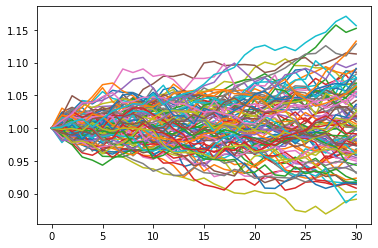

In [5]:
for i in range(M):
  plt.plot(S[i,:])

plt.show()

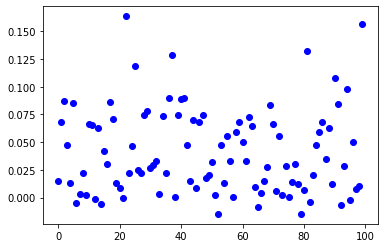

(array([16., 22., 17., 10., 18., 10.,  2.,  1.,  2.,  2.]),
 array([-0.01472118,  0.00310452,  0.02093023,  0.03875593,  0.05658163,
         0.07440733,  0.09223303,  0.11005873,  0.12788443,  0.14571013,
         0.16353584]),
 <a list of 10 Patch objects>)

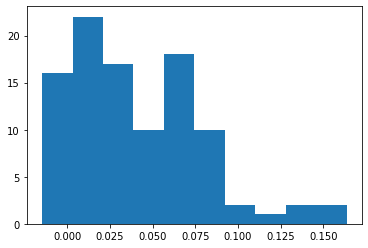

In [6]:
min = [S0]*M
LC_float = [0]*M

for i in range(M):
  for j in range(N):
    if(min[i]>S[i,j]):
      min[i] = S[i,j]
  LC_float[i] = S[i,N]-min[i]
plt.plot(LC_float[:],'ob')
plt.show()
plt.hist(LC_float)

In [7]:
np.mean(LC_float)*np.exp(-r*T)

0.04125056139762057

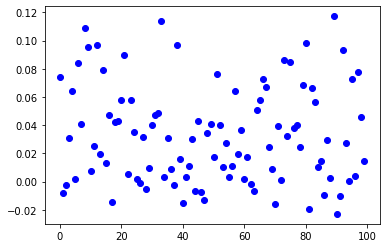

(array([ 8., 20., 14., 13., 14.,  8.,  8.,  6.,  6.,  3.]),
 array([-0.02287525, -0.00886486,  0.00514553,  0.01915593,  0.03316632,
         0.04717672,  0.06118711,  0.07519751,  0.0892079 ,  0.1032183 ,
         0.11722869]),
 <a list of 10 Patch objects>)

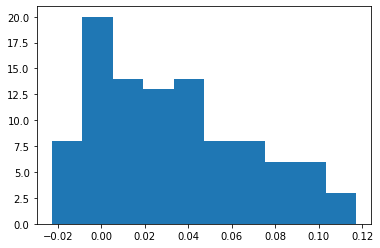

In [8]:
max = [S0]*M
LP_float = [0]*M

for i in range(M):
  for j in range(N):
    if(max[i]<S[i,j]):
      max[i] = S[i,j]
  LP_float[i] = max[i]-S[i,N]
plt.plot(LP_float[:],'ob')
plt.show()
plt.hist(LP_float)

In [9]:
np.mean(LP_float)*np.exp(-r*T)

0.033154375325119896

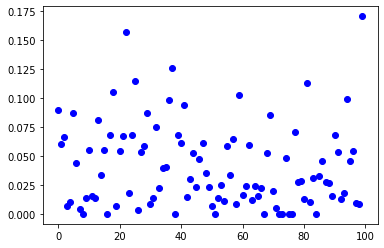

(array([35., 19.,  8., 20.,  5.,  6.,  4.,  1.,  0.,  2.]),
 array([0.        , 0.01706213, 0.03412426, 0.05118638, 0.06824851,
        0.08531064, 0.10237277, 0.1194349 , 0.13649702, 0.15355915,
        0.17062128]),
 <a list of 10 Patch objects>)

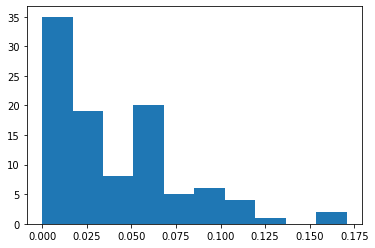

In [10]:
K=1

LC_fix = [0]*M

for i in range(M):
  LC_fix[i] = np.maximum(max[i]-K,0)
plt.plot(LC_fix[:],'ob')
plt.show()
plt.hist(LC_fix)

In [11]:
np.mean(LC_fix)*np.exp(-r*T)

0.04111651760115586

1 0
1 0
0.9812448982306775 0.01875510176932249
0.9290019755030343 0.07099802449696568
0.9325032736103049 0.06749672638969506
1 0
0.9642570360461584 0.03574296395384158
0.9607393441103468 0.03926065588965322
0.8690396446617328 0.13096035533826722
0.9161099795423081 0.0838900204576919
0.9808156174588166 0.019184382541183376
0.92531397985317 0.07468602014683001
0.9179778653903882 0.08202213460961183
0.9986790065337398 0.0013209934662602452
0.9603484467433385 0.039651553256661476
1 0
0.9224831780403114 0.07751682195968856
0.9960139298428281 0.003986070157171895
0.9923121779219045 0.007687822078095485
0.9507525249234865 0.0492474750765135
0.9882383903556092 0.01176160964439077
0.977394771273667 0.02260522872633297
0.9885816408288725 0.011418359171127546
0.9376166500380828 0.06238334996191719
0.9864765757088968 0.013523424291103203
0.9946087398948446 0.005391260105155449
0.979184781458435 0.020815218541564984
1 0
0.9897446609058572 0.010255339094142779
0.9991606858030061 0.000839314196993901

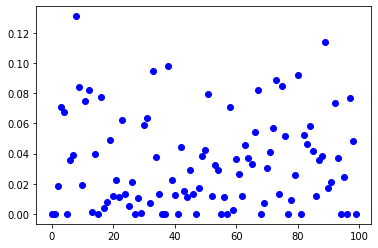

(array([38., 12., 15., 11.,  6.,  7.,  6.,  3.,  1.,  1.]),
 array([0.        , 0.01309604, 0.02619207, 0.03928811, 0.05238414,
        0.06548018, 0.07857621, 0.09167225, 0.10476828, 0.11786432,
        0.13096036]),
 <a list of 10 Patch objects>)

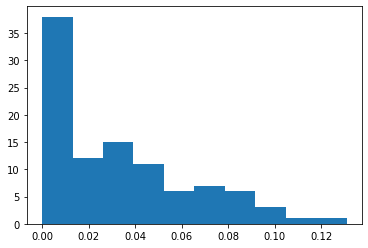

In [12]:
LP_fix = [0]*M

for i in range(M):
  LP_fix[i] = np.maximum(K-min[i],0)
  print(min[i], LP_fix[i])
plt.plot(LP_fix[:],'ob')
plt.show()
plt.hist(LP_fix)

In [13]:
np.mean(LP_fix)*np.exp(-r*T)

0.03328841912158461

In [14]:
bsmin = np.empty([M,N+1])
LC = np.empty([M,N+1])
LC_mean = np.empty([M])

for i in range(M):
  for j in range(N+1):
    bsmin[i,j] = S0
    for k in range(j):
      if(S[i,k]<bsmin[i,j]):
        bsmin[i,j] = S[i,k]
    a1 = (np.log(S[i,j]/bsmin[i,j]) + (r+0.5*sig**2)*(T-j*dt))/sig*np.sqrt(T-j*dt)
    a2 = a1-sig*np.sqrt(T-j*dt)
    a3 = a1-2*r*np.sqrt(T-j*dt)/sig
    LC[i,j] = S[i,j]*norm.cdf(a1)-bsmin[i,j]*np.exp(-r*(T-j*dt))*norm.cdf(a2)-((S[i,j]*sig**2)/(2*r))*(norm.cdf(-a1)-np.exp(-r*(T-j*dt))*((bsmin[i,j]/S[i,j])**(2*r/sig**2))*norm.cdf(-a3))
    LC_mean[i] = np.mean(LC[i])
    print(np.mean(LC_mean[i]))

nan
nan
nan
6.4716814351044775e+270
6.4716814351044775e+270
6.4716814351044775e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
6.50576496873322e+270
-1.9761069819434605e+267
-1.9761069819434605e+267
-1.9761069819434605e+267
-1.9761069819434605e+267
-2.128245792127144e+177
-2.128245792127144e+177
-2.128245792127144e+177
-2.128245792127144e+177
0.032448323195518866
2.772680050124114e+278
2.772680050124114e+278
2.772680050124114e+278
2.772680050124114e+278
2.772680050124114e+278
2.772680050124114e+278
2.772680050124114e+278
2.772680050124114e+278
2.772680050124114e+278
2.772680050124114e+278
2.772680050124114e+278
2.772680050124114e+278
2.772680050124114e+278
2.7726800501055642e+278
2.7726800501055642e+278


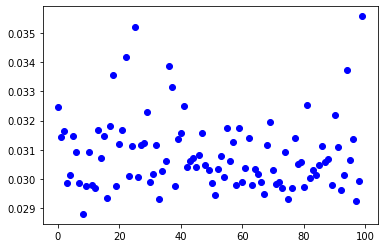

In [15]:
plt.plot(LC_mean[:],'ob')
plt.show()

In [16]:
bsmax = np.empty([M,N+1])
LP = np.empty([M,N+1])
LP_mean = np.empty([M])

for i in range(M):
  for j in range(N+1):
    bsmax[i,j] = S0
    for k in range(j):
      if(S[i,k]>bsmax[i,j]):
        bsmax[i,j] = S[i,k]
    a1 = (np.log(S[i,j]/bsmax[i,j]) + (r+0.5*sig**2)*(T-j*dt))/sig*np.sqrt(T-j*dt)
    a2 = a1-sig*np.sqrt(T-j*dt)
    a3 = a1-2*r*np.sqrt(T-j*dt)/sig
    LP[i,j] = -S[i,j]*norm.cdf(-a1)+bsmax[i,j]*np.exp(-r*(T-j*dt))*norm.cdf(-a2)-((S[i,j]*sig**2)/(2*r))*(norm.cdf(a1)-np.exp(-r*(T-j*dt))*((bsmax[i,j]/S[i,j])**(2*r/sig**2))*norm.cdf(-a3))
    LP_mean[i] = np.mean(LP[i])
    print(LC_mean[i])

0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.032448323195518866
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.03144141382958753
0.0314414

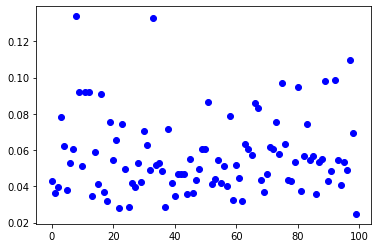

In [17]:
plt.plot(LP_mean[:],'ob')
plt.show()

In [18]:
import tensorflow as tf

In [31]:
my_input = []

K=bsmin[i]

premium = tf.keras.layers.Input(shape=(1,), name="premium")
my_input = my_input + [premium]

hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
my_input = my_input + [hedge_cost]

price = tf.keras.layers.Input(shape=(1,), name='price')
my_input = my_input + [price]

for i in range(N):
  delta = tf.keras.layers.Dense(1, name=str(i))(price)
  
  new_price = tf.keras.layers.Input(shape=(1,), name="S_"+str(i))
  my_input = my_input + [new_price]

  price_inc = tf.keras.layers.Subtract(name="price_inc_"+str(i))([price,new_price])
  cost = tf.keras.layers.Multiply(name="multiply_"+str(i))([delta, price_inc])
  hedge_cost = tf.keras.layers.Add(name="cost_"+str(i))([hedge_cost,cost])
  price = new_price

payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(K-x,0), name='payoff')(price)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=hedge_cost)

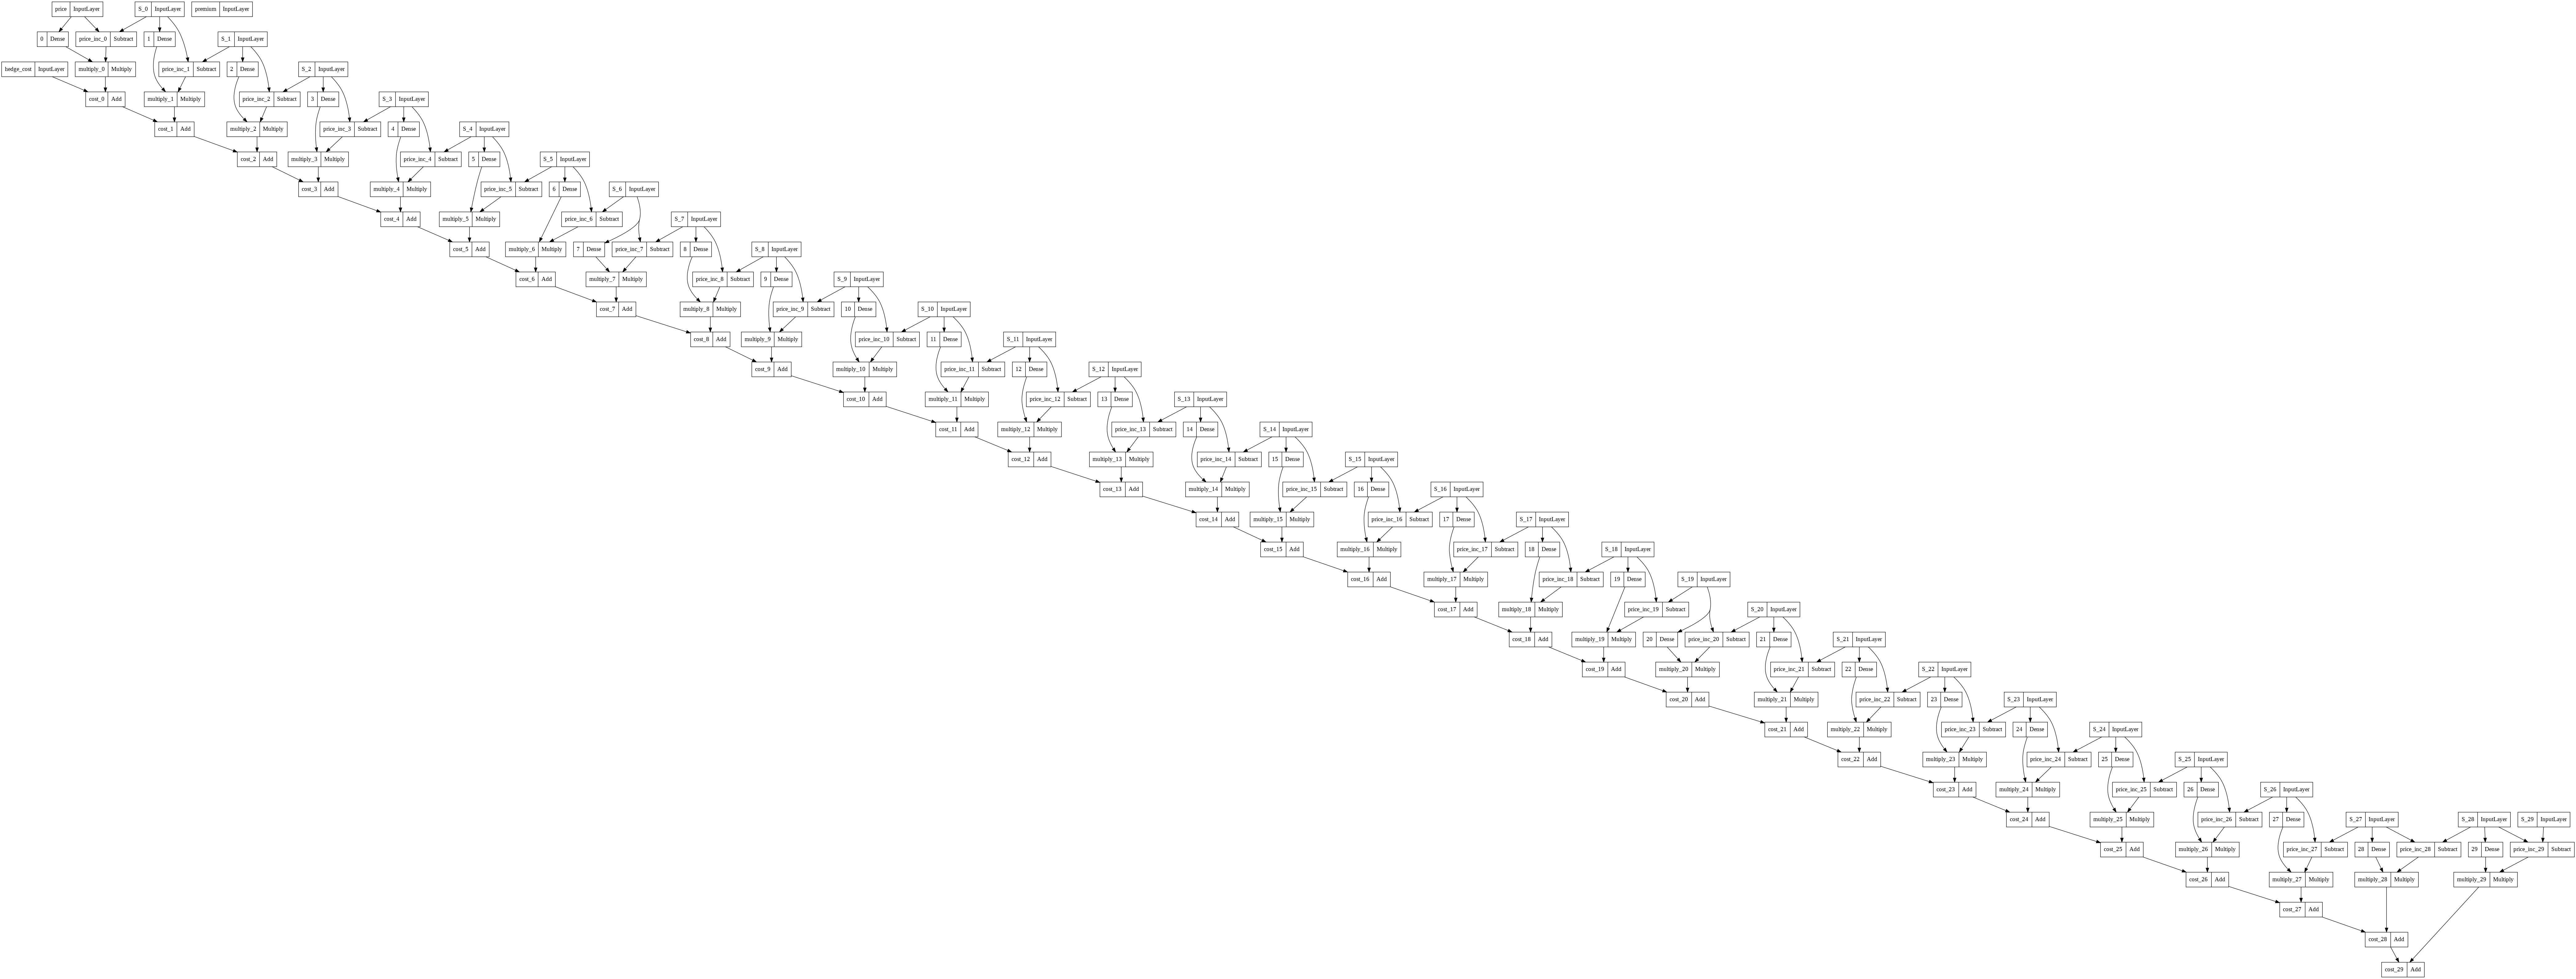

In [32]:
tf.keras.utils.plot_model(model)

In [26]:
premium = LC_mean[i] * np.ones([M,1])
cost = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[SS]
y = np.zeros([M,1])

In [34]:
model.compile(loss='mse',optimizer='adam')

In [35]:
hist = model.fit(x,y,batch_size=32, epochs=100, verbose=True, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 3s 263ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 5/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 6/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 8/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 9/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 10/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 11/100
3/3 [

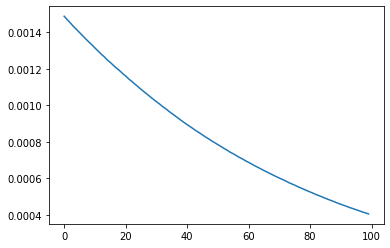

In [29]:
plt.plot(hist.history['loss'])
plt.show()

4/4 [==============================] - 0s 4ms/step


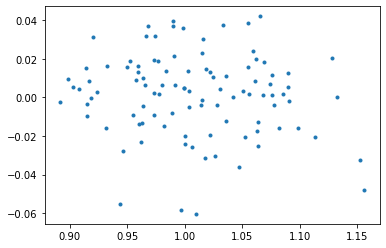

In [30]:
plt.plot(S[:,-1],model.predict(x), marker=".",linestyle='none')
plt.show()